In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [32]:
def plot_decision_boundary(X, y, classifier, resolution=0.02):
    """
    
    Modified version of an implementation in
    https://drive.google.com/file/d/1nbvSjBP5NvC4xPuCFs1_3QtV1I-keKlN/view?usp=sharing

    """
    markers = ('o', 's')
    colors = ('tab:blue', 'tab:orange')
    cmap = ListedColormap(colors)
    
    # define the grid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    
    if classifier is not None:
        # for each grid point, predict the class
        lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        lab = lab.reshape(xx1.shape)
    
        # plot the decision regions
        plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
    
    # plot the data points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}')
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
        plt.legend()

In [33]:
class SimplePerceptron:
    """Perceptron classifier
    
    Modified version of an implementation in
    https://drive.google.com/file/d/1nbvSjBP5NvC4xPuCFs1_3QtV1I-keKlN/view?usp=sharing

    """
    def __init__(self, epochs, eta=1):
        self.epochs = epochs
        self.eta = eta
        
    def fit(self, X, y):
        # initialize weights with random numbers
        rgn = np.random.default_rng(seed=0)
        self.weights = rgn.standard_normal(X.shape[1])
        self.bias = 0.
        
        steps = 0
        for e in range(self.epochs):
            for xi, yi in zip(X, y):
                error = yi - self.predict(xi)
                self.weights += self.eta * error * xi
                self.bias += self.eta * error
                
                # plot the decision boundary if it is changed
                if error != 0:
                    steps += 1
                    plot_decision_boundary(X, y, self)
                    plt.title(f'Update no. {steps}')
                    plt.xlabel('feature 1')
                    plt.ylabel('feature 2')
                    plt.legend()
                    plt.show()
    
    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, 0)

In [34]:
# create some toy data
rng = np.random.default_rng(seed=0)
X = rng.standard_normal((30, 2))

# divide the data into two classes along the line x2=-x1
y = np.where(X[:,0]+X[:,1] >= 0, 1, 0)

In [35]:
X

array([[ 0.12573022, -0.13210486],
       [ 0.64042265,  0.10490012],
       [-0.53566937,  0.36159505],
       [ 1.30400005,  0.94708096],
       [-0.70373524, -1.26542147],
       [-0.62327446,  0.04132598],
       [-2.32503077, -0.21879166],
       [-1.24591095, -0.73226735],
       [-0.54425898, -0.31630016],
       [ 0.41163054,  1.04251337],
       [-0.12853466,  1.36646347],
       [-0.66519467,  0.35151007],
       [ 0.90347018,  0.0940123 ],
       [-0.74349925, -0.92172538],
       [-0.45772583,  0.22019512],
       [-1.00961818, -0.20917557],
       [-0.15922501,  0.54084558],
       [ 0.21465912,  0.35537271],
       [-0.65382861, -0.12961363],
       [ 0.78397547,  1.49343115],
       [-1.25906553,  1.51392377],
       [ 1.34587542,  0.7813114 ],
       [ 0.26445563, -0.31392281],
       [ 1.45802068,  1.96025832],
       [ 1.80163487,  1.31510376],
       [ 0.35738041, -1.20831863],
       [-0.00445413,  0.65647494],
       [-1.28836146,  0.39512206],
       [ 0.42986369,

In [36]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0])

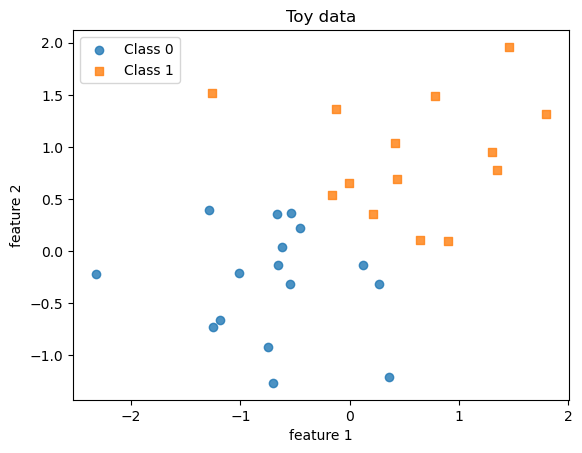

In [37]:
# plot the data
plot_decision_boundary(X, y, None)
plt.title('Toy data')
plt.show()

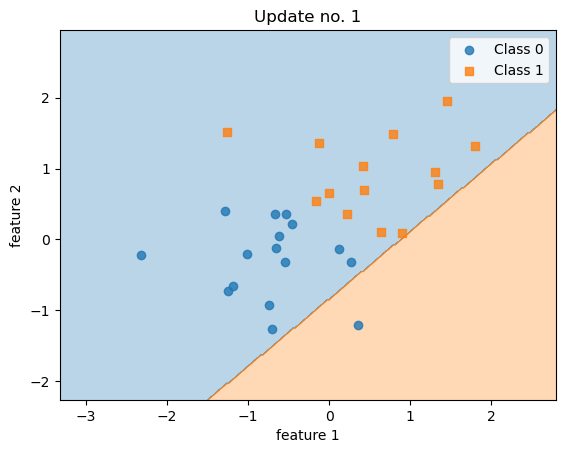

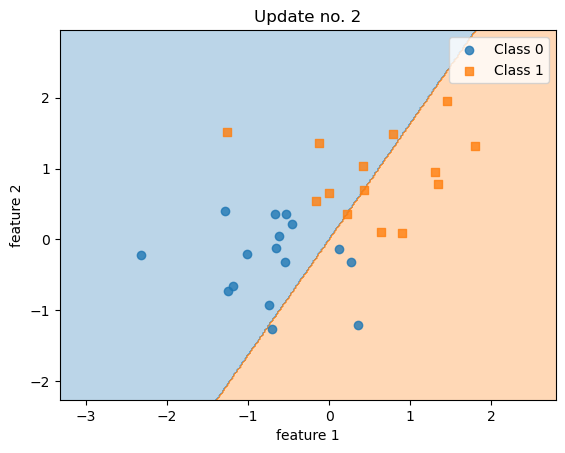

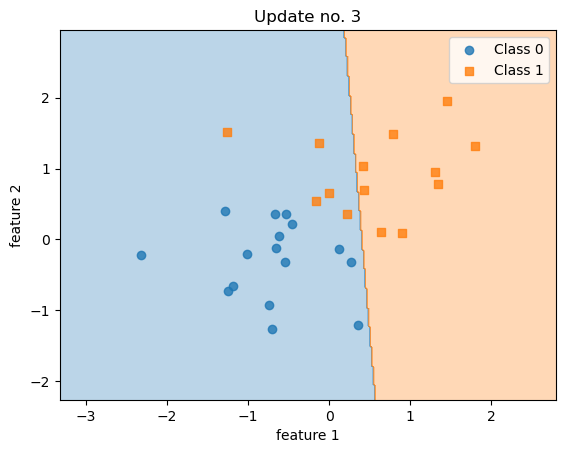

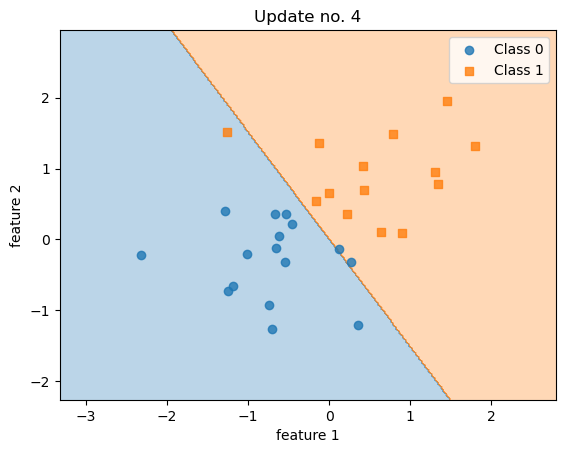

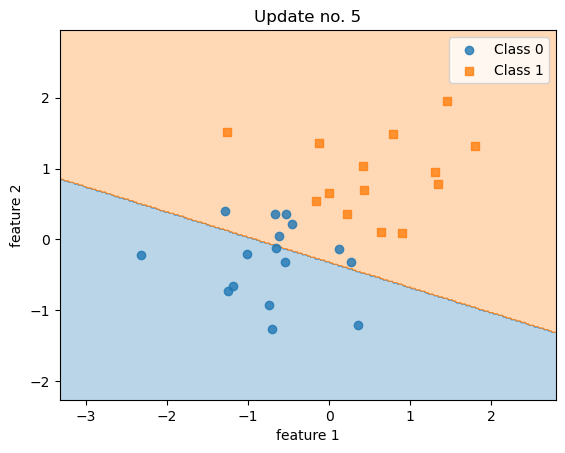

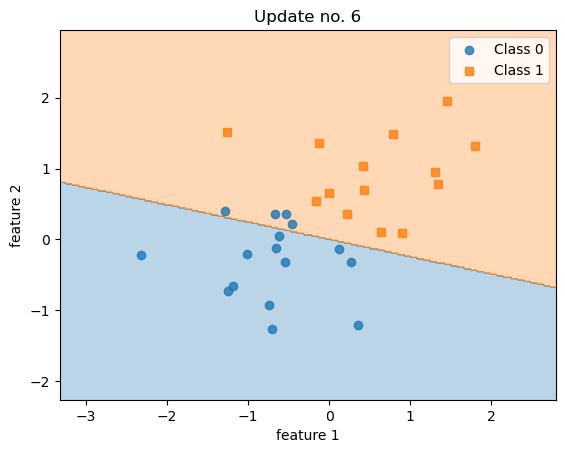

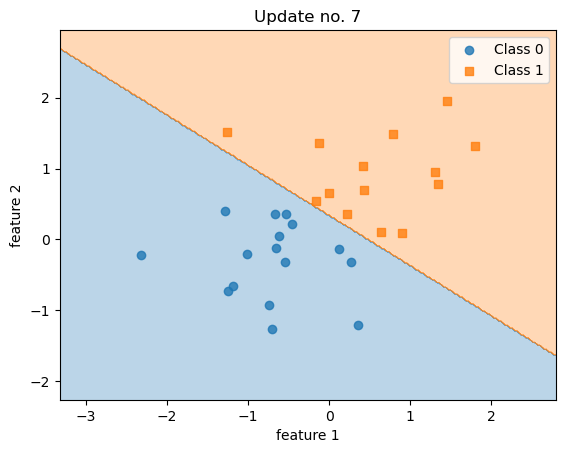

In [38]:
ppn = SimplePerceptron(epochs=1, eta=0.1)
ppn.fit(X, y)

In [39]:
# using API of sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
from sklearn.linear_model import Perceptron

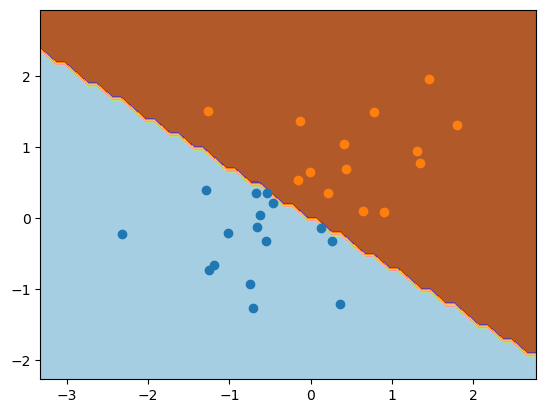

In [40]:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# define the model
model = Perceptron(tol=1e-3, random_state=0)
# fit the model
model.fit(X, y)

# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])